Load Julia packages (libraries) needed  for the snippets in chapter 0

In [1]:
using StatisticalRethinking, CmdStan, StanMCMCChain, LinearAlgebra
gr(size=(500,500));

CmdStan uses a tmp directory to store the output of cmdstan

In [2]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

### snippet 4.7

In [3]:
howell1 = CSV.read(rel_path("..", "data", "Howell1.csv"), delim=';')
df = convert(DataFrame, howell1);

Use only adults

In [4]:
df2 = filter(row -> row[:age] >= 18, df);
first(df2, 5)

,height,weight,age,male
,Float64⍰,Float64⍰,Float64⍰,Int64⍰
1,151.765,47.8256,63.0,1
2,139.7,36.4858,63.0,0
3,136.525,31.8648,65.0,0
4,156.845,53.0419,41.0,1
5,145.415,41.2769,51.0,0


Use data from m4.1s

Check if the m4.1s.jls file is present. If not, run the model.

In [5]:
!isfile("m4.1s.jls") && include("m4.1s.jl")

chn = deserialize("m4.1s.jls")

Object of type "Chains{Float64}"

Iterations = 1:1000
Thinning interval = 1
Chains = 1,2,3,4
Samples per chain = 1000

Union{Missing, Float64}[8.0817 154.455; 7.75033 154.353; … ; 7.67514 154.883; 7.5117 154.962]

Union{Missing, Float64}[7.93177 154.829; 7.65988 154.438; … ; 7.56131 154.757; 7.85861 154.264]

Union{Missing, Float64}[7.08114 154.15; 7.64416 154.933; … ; 8.26262 155.129; 8.1165 155.075]

Union{Missing, Float64}[7.33591 154.866; 8.07461 154.345; … ; 7.72548 154.471; 7.67535 154.98]

Describe the draws

In [6]:
describe(chn)

Iterations = 1:1000
Thinning interval = 1
Chains = 1,2,3,4
Samples per chain = 1000

Empirical Posterior Estimates:
          Mean        SD       Naive SE       MCSE      ESS
sigma   7.7674183 0.28353429 0.0044830708 0.0054339278 1000
   mu 154.6031108 0.41474655 0.0065577187 0.0060332630 1000

Quantiles:
          2.5%       25.0%      50.0%    75.0%      97.5%  
sigma   7.2262033   7.5746475   7.7602   7.95167   8.361331
   mu 153.7789500 154.3290000 154.6010 154.88100 155.422175



Plot the density of posterior draws

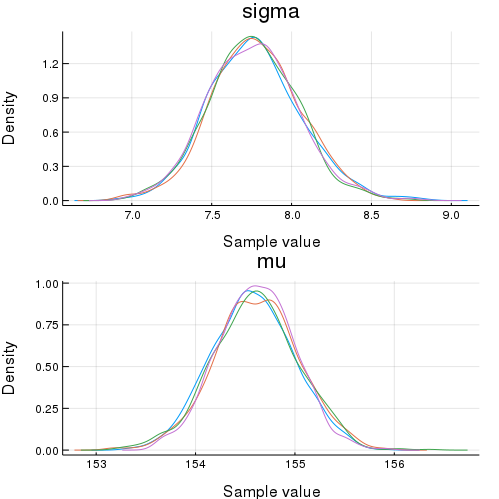

In [7]:
density(chn, lab="All heights", xlab="height [cm]", ylab="density")

Compute cor

In [8]:
mu_sigma = hcat(chn.value[:, 2, 1], chn.value[:,1, 1])
LinearAlgebra.diag(cov(mu_sigma))

2-element Array{Float64,1}:
 0.1699782625815813
 0.0856615970263864

Compute cov

In [9]:
cor(mu_sigma)

2×2 Array{Float64,2}:
  1.0        -0.0199812
 -0.0199812   1.0      

End of `clip_07.0s.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*